In [52]:
# Setup

from dolo import *
import dolark 
from dolark import HModel
from dolark.equilibrium import find_steady_state
from dolark.perturbation import perturb
from dolo import time_iteration, improved_time_iteration
from matplotlib import pyplot as plt
import numpy as np

In [53]:
#HModel reads the yaml file
aggmodel = HModel('Aiyagari.yaml')
aggmodel


In [54]:
aggmodel.features

{'ex-ante-identical': True,
 'conditional-processes': False,
 'iid-shocks': False}

In [55]:
eq = find_steady_state(aggmodel)
eq

Computing Initial Initial Rule... done
Computing Steady State...done


In [57]:
eq.y  # y is the aggregate endogenous variable

array([6.33612038])

In [58]:
eq.m # aggregate exogenous

array([0.])

In [59]:
eq.aggmodel

In [60]:
print(eq.μ[0,:].sum())
print(eq.μ[1,:].sum())
print(eq.μ[2,:].sum())

0.24999999999999994
0.5000000000000004
0.24999999999999936


In [61]:
eq.μ.shape[0]

3

Text(0.5, 1.0, 'Wealth Distribution by Income')

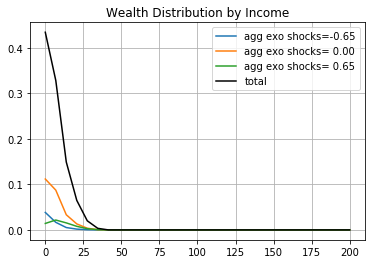

In [62]:
for i in range(eq.μ.shape[0]):
    s = eq.dr.endo_grid.nodes() # grid for states (temporary)
    plt.plot(s, eq.μ[i,:]*(eq.μ[i,:].sum()), label=f"agg exo shocks={eq.dr.exo_grid.node(i)[2]: .2f}")
plt.plot(s, eq.μ.sum(axis=0), label='total', color='black')
plt.grid()
plt.legend(loc='upper right')
plt.title("Wealth Distribution by Income")

In [63]:
eq.dr.exo_grid.nodes()

array([[ 0.03044232,  1.2440459 , -0.64888568],
       [ 0.03044232,  1.2440459 ,  0.        ],
       [ 0.03044232,  1.2440459 ,  0.64888568]])

In [65]:
eq.as_df()

,i_m,r,w,e,a,μ,i
0,0.0,0.030442,1.244046,-0.648886,-1.000000e-10,1.537294e-01,-1.000000e-10
1,0.0,0.030442,1.244046,-0.648886,6.896552e+00,6.660702e-02,6.418651e+00
2,0.0,0.030442,1.244046,-0.648886,1.379310e+01,2.084279e-02,1.305163e+01
3,0.0,0.030442,1.244046,-0.648886,2.068966e+01,6.928995e-03,1.978489e+01
4,0.0,0.030442,1.244046,-0.648886,2.758621e+01,1.666539e-03,2.655182e+01
5,0.0,0.030442,1.244046,-0.648886,3.448276e+01,2.228881e-04,3.333614e+01
6,0.0,0.030442,1.244046,-0.648886,4.137931e+01,2.319558e-06,4.013077e+01
7,0.0,0.030442,1.244046,-0.648886,4.827586e+01,-1.710984e-16,4.693204e+01
8,0.0,0.030442,1.244046,-0.648886,5.517241e+01,-1.555126e-16,5.373786e+01
9,0.0,0.030442,1.244046,-0.648886,6.206897e+01,-1.429016e-16,6.054693e+01


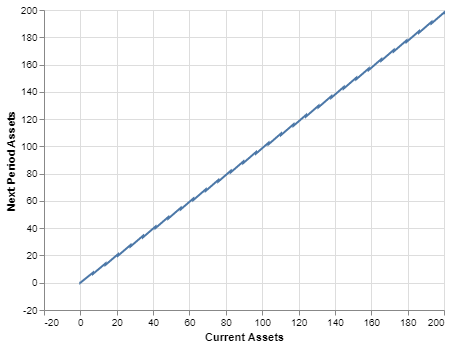

In [98]:
import altair as alt
import pandas as pd
df = eq.as_df()

alt.Chart(df).mark_line().encode(
    x = alt.X('a', axis = alt.Axis(title='Current Assets')),
    y = alt.Y('i', axis=alt.Axis(title='Next Period Assets'))
)



In [67]:
import math

In [68]:
# extract variables from the steady state solution
a = df['a']
r = df['r']
w = df['w']
e = df['e']
i = df['i']

In [69]:
# generate a colume matrix with zeros
c = np.zeros((len(df),1))
income = np.zeros((len(df),1))

In [70]:
# calculate consumption
for j in range(len(df)):
    c[j] = (1+r[j])*a[j] + w[j]*math.exp(e[j]) - i[j]

In [71]:
# calcuate income
for j in range(len(df)):
    income[j] = r[j]*a[j] + w[j]*math.exp(e[j])

In [72]:
# aggregate consumption
agg_c = sum(c)
agg_c

array([527.98313533])

In [73]:
# aggregate income
agg_income = sum(income)
agg_income
# aggregate income is smaller than aggregate consumption, wierd, prob hasn't been solved yet.

array([402.21842965])

In [74]:
# saving rate 
saving = 1-agg_c/agg_income
saving

array([-0.31267763])